# Capitol 1: Introducere în Învățarea Nesupervizată

Bun venit la cursul de Învățare Nesupervizată! Spre deosebire de învățarea supervizată (cum ar fi regresia sau clasificarea), unde avem date etichetate și un obiectiv clar (de exemplu, prezicerea unui preț sau a unei categorii), în învățarea nesupervizată explorăm date **neetichetate**. Scopul nostru este să descoperim structuri, modele sau grupuri ascunse direct în date, fără a avea un răspuns corect predefinit.

Gândiți-vă la diferența dintre a sorta o cutie de piese Lego având instrucțiuni (supervizat) și a o sorta pur și simplu grupând piesele după culoare și formă, fără nicio instrucțiune (nesupervizat). În al doilea caz, descoperiți singuri categoriile.

## Sarcinile principale în Învățarea Nesupervizată

Există trei mari categorii de probleme pe care le putem rezolva cu învățarea nesupervizată:

### 1. Clustering (Grupare)

**Clustering-ul** este procesul de a grupa seturi de date similare în categorii sau **clustere**. Scopul este ca obiectele din același grup să fie cât mai asemănătoare între ele și cât mai diferite de obiectele din alte grupuri.

**Analogia coșului cu fructe:** Imaginați-vă că aveți un coș plin cu mere, pere și căpșuni. Fără să vi se spună ce este fiecare fruct, un algoritm de clustering le-ar putea grupa în trei grămezi: una cu toate merele, una cu perele și una cu căpșunile, bazându-se pe caracteristici precum **culoare**, **formă** și **mărime**.

### 2. Reducerea Dimensionalității (Dimensionality Reduction)

Această tehnică este folosită pentru a simplifica datele, reducând numărul de variabile (sau **dimensiuni**) luate în considerare. Se păstrează doar informațiile esențiale, eliminând zgomotul sau datele redundante. Acest lucru face ca algoritmii să ruleze mai rapid și, uneori, chiar să ofere rezultate mai bune.


### 3. Detectarea Anomaliilor (Anomaly Detection)

Această sarcină se concentrează pe identificarea observațiilor, evenimentelor sau elementelor care sunt neobișnuite și diferă semnificativ de majoritatea datelor. Aceste **anomalii** pot reprezenta erori, fraude sau evenimente rare, dar importante.

**Analogia mașinuței de jucărie:** Dacă ați avea o parcare plină de mașini reale și o singură mașinuță de jucărie, un algoritm de detectare a anomaliilor ar semnala imediat mașinuța ca fiind un element neobișnuit, care nu se potrivește cu restul.

In [ ]:
# __EXERCIȚIU__
# Pentru fiecare scenariu de mai jos, identificați dacă este o problemă de:
# A) Învățare Supervizată - Clasificare
# B) Învățare Supervizată - Regresie
# C) Învățare Nesupervizată - Clustering
# Scrieți litera corespunzătoare în variabilele de mai jos (ex: raspuns_1 = 'A').

# 1. O companie de marketing vrea să împartă clienții în grupuri pe baza
# comportamentului lor de cumpărare pentru a trimite oferte personalizate.
raspuns_1 = 'C'

# 2. O bancă dorește să prezică dacă un client va rambursa sau nu un credit, pe
# baza istoricului său financiar.
raspuns_2 = 'A'

# 3. O agenție imobiliară vrea să estimeze prețul unei case pe baza suprafeței,
# numărului de camere și a locației.
raspuns_3 = 'B'

# 4. Un serviciu de streaming de muzică vrea să recomande utilizatorilor melodii
# noi, grupând melodiile cu caracteristici audio similare.
raspuns_4 = 'C'

# HINT: Gândiți-vă dacă există o valoare țintă (etichetă) pe care încercăm să o
# prezicem.
# Dacă da -> Supervizat.
#   Dacă valoarea este o categorie -> Clasificare
#   Dacă este un număr -> Regresie.
# Dacă nu avem o valoare țintă și doar explorăm datele pentru a găsi grupuri
# -> Nesupervizat.

___

# Capitol 2: Clustering - Măsuri de Evaluare

Cum știm dacă un algoritm de clustering și-a făcut treaba bine? Deoarece nu avem etichete cu care să comparăm rezultatul, trebuie să ne bazăm pe **măsuri interne**. Acestea evaluează calitatea clusterelor create folosind doar datele și structura grupurilor.

O grupare bună are două calități esențiale:
* **Similaritate intra-cluster ridicată**: Punctele din același cluster sunt foarte apropiate și asemănătoare.
* **Similaritate inter-cluster scăzută**: Clusterele diferite sunt bine separate și distincte unele de altele.

**Analogia insulelor:** Un clustering bun este ca un arhipelag de insule distincte. Fiecare insulă (cluster) este compactă, cu toate punctele de pe ea apropiate (similaritate intra-cluster ridicată). În același timp, insulele sunt separate de porțiuni mari de apă (similaritate inter-cluster scăzută).

## Suma Erorilor Pătratice (Sum of Squared Errors - SSE)

SSE, cunoscută și sub numele de **inerție**, măsoară cât de compacte sunt clusterele. Pentru fiecare cluster, se calculează suma distanțelor pătratice dintre fiecare punct și **centroidul** (centrul) clusterului respectiv. SSE total este suma acestor valori pentru toate clusterele.

O valoare **mică** a SSE indică faptul că punctele sunt strâns grupate în jurul centrelor lor, deci clusterele sunt dense și compacte.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Exemplu 1: Două clustere, unul compact și unul dispersat
cluster_compact = np.array([[1, 2], [2, 2], [1, 3]])
cluster_dispersat = np.array([[8, 8], [10, 10], [12, 8]])

# Calculăm centroizii (media pe fiecare axă)
centroid_compact = cluster_compact.mean(axis=0)
centroid_dispersat = cluster_dispersat.mean(axis=0)

# Calculăm SSE pentru fiecare cluster
# np.sum((cluster - centroid)**2) calculează distanța euclidiană pătratică
sse_compact = np.sum((cluster_compact - centroid_compact)**2)
sse_dispersat = np.sum((cluster_dispersat - centroid_dispersat)**2)

print(f"Centroid cluster compact: {centroid_compact}")
print(f"SSE cluster compact: {sse_compact:.2f}")
print(f"Centroid cluster dispersat: {centroid_dispersat}")
print(f"SSE cluster dispersat: {sse_dispersat:.2f}")

# OBS.: Clusterul compact are o valoare SSE mult mai mică, ceea ce reflectă
# corect faptul că punctele sale sunt mai apropiate.
# O problemă cu SSE este că valoarea sa va scădea mereu pe măsură ce adăugăm mai
# multe clustere.
# În cazul extrem, dacă fiecare punct este propriul său cluster, SSE va fi 0.

Centroid cluster compact: [1.33333333 2.33333333]
SSE cluster compact: 1.33
Centroid cluster dispersat: [10.          8.66666667]
SSE cluster dispersat: 10.67


In [2]:
# __EXERCIȚIU__
# Se dă un nou cluster de puncte. Calculați centroidul și valoarea SSE.
cluster_nou = np.array([[5, 5], [5, 6], [6, 5], [6, 6], [10,10]])

# 1. Calculați centroidul clusterului
centroid_nou = cluster_nou.mean(axis = 0)

# 2. Calculați SSE pentru cluster
sse_nou = np.sum((cluster_nou - centroid_nou) ** 2)

print(f"Centroid: {centroid_nou}")
print(f"SSE: {sse_nou}")

# HINT: Folosiți metodele .mean() și funcția np.sum() ca în exemplul de mai sus.

Centroid: [6.4 6.4]
SSE: 34.400000000000006


## Coeficientul Silhouette

Coeficientul Silhouette este o măsură mai complexă care evaluează atât cât de bine este grupat un punct în propriul cluster (**coeziune**), cât și cât de bine este separat de celelalte clustere (**separație**). Scorul variază între **-1** și **1**:

* Un scor aproape de **+1** indică faptul că punctul este departe de clusterele vecine (separare bună).
* Un scor de **0** indică faptul că punctul este foarte aproape de granița dintre două clustere.
* Un scor aproape de **-1** indică faptul că punctul ar putea fi atribuit greșit unui cluster.

Pentru un set de date, se calculează scorul Silhouette mediu pentru toate punctele. O valoare medie mai mare indică un clustering mai bun.

Scorul Silhouette pentru acest clustering este: 0.87


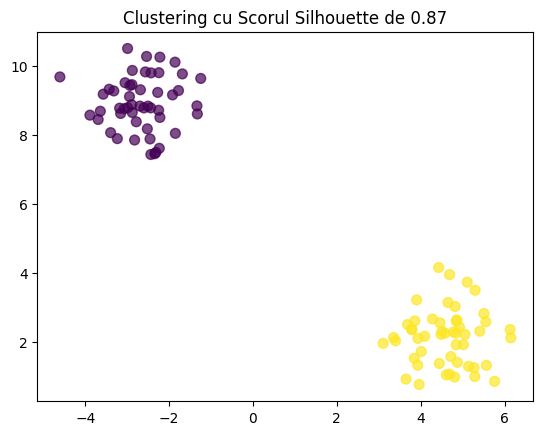

In [3]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# Exemplu 2: Generăm date și etichete pentru a folosi silhouette_score
X, y_true = make_blobs(n_samples=100, centers=2, cluster_std=0.80, random_state=42)

# Presupunem că un algoritm de clustering a generat aceste etichete (perfecte,
# în acest caz)
y_pred = y_true

score = silhouette_score(X, y_pred)
print(f"Scorul Silhouette pentru acest clustering este: {score:.2f}")

# Vizualizare
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=50, alpha=0.7)
plt.title(f"Clustering cu Scorul Silhouette de {score:.2f}")
plt.show()

# OBS.: silhouette_score din sklearn este un instrument puternic pentru a
# compara performanța diferitor algoritmi de clustering sau a diferitor numere
# de clustere (k).

In [ ]:
# __EXERCIȚIU__
# Se dau aceleași date X de mai sus, dar de data aceasta, etichetele prezise
# (y_pred_rau) sunt amestecate.
# Calculați scorul Silhouette pentru acest clustering "rău" și observați
# diferența.

# Amestecăm etichetele pentru a simula un clustering prost
y_pred_rau = np.random.permutation(y_true)

# Calculați scorul Silhouette
score_rau = None
print(f"Scorul Silhouette pentru clustering-ul rău este: {score_rau:.2f}")

# Vizualizare
plt.scatter(X[:, 0], X[:, 1], c=y_pred_rau, cmap='viridis', s=50, alpha=0.7)
plt.title(f"Clustering rău, Scorul Silhouette: {score_rau:.2f}")
plt.show()

# HINT: Scorul ar trebui să fie semnificativ mai mic, posibil chiar negativ,
# indicând că punctele sunt amestecate.

## Problema Măsurilor Interne
Măsurile interne precum SSE și Silhouette sunt utile, dar au o limitare importantă: majoritatea presupun că clusterele sunt **convexe** și **izotrope** (de formă sferică și cu densitate similară). Ele pot evalua greșit un clustering care este de fapt corect, dar are o formă complexă.


Scorul Silhouette pentru clustering-ul perfect al cercurilor este: 0.11


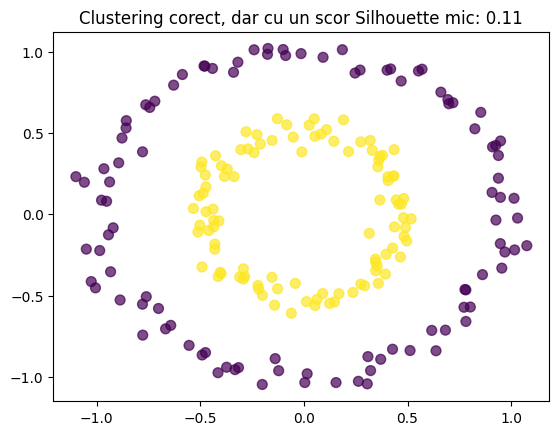

In [4]:
from sklearn.datasets import make_circles

# Exemplu 3: Generăm date care formează două cercuri concentrice
X_cercuri, y_cercuri = make_circles(n_samples=200, factor=0.5, noise=0.05, random_state=0)

# Acestea sunt etichetele corecte, care separă perfect cercurile
score_cercuri = silhouette_score(X_cercuri, y_cercuri)

print(f"Scorul Silhouette pentru clustering-ul perfect al cercurilor este: {score_cercuri:.2f}")

# Vizualizare
plt.scatter(X_cercuri[:, 0], X_cercuri[:, 1], c=y_cercuri, cmap='viridis', s=50, alpha=0.7)
plt.title(f"Clustering corect, dar cu un scor Silhouette mic: {score_cercuri:.2f}")
plt.show()

# OBS.: Deși vizual gruparea este perfectă, scorul Silhouette este mic.
# Asta se întâmplă deoarece metrica nu poate înțelege că un cluster poate fi
# "în interiorul" altuia.
# Acest exemplu subliniază importanța de a alege o metrică și un algoritm
# potrivite pentru structura datelor.

___

# Capitol 3: Algoritmi de Clustering Bazați pe Centroizi: K-Means

**K-Means** este unul dintre cei mai cunoscuți și utilizați algoritmi de clustering. Este un algoritm bazat pe **centroizi**, ceea ce înseamnă că grupează datele încercând să minimizeze distanța dintre puncte și centrul clusterului din care fac parte.

Principalul său avantaj este viteza și simplitatea, dar necesită ca noi să specificăm de la început numărul de clustere (**k**).

## Cum funcționează K-Means?

Algoritmul funcționează iterativ, în trei pași:

1.  **Inițializare**: Se aleg aleatoriu **k** puncte din setul de date, care vor fi centroizii inițiali.
2.  **Atribuire**: Fiecare punct din setul de date este atribuit celui mai apropiat centroid, formând astfel **k** clustere.
3.  **Actualizare**: Pentru fiecare cluster nou format, se recalculează centroidul (ca fiind media tuturor punctelor din acel cluster).

Pașii 2 și 3 se repetă până când centroizii nu își mai modifică poziția semnificativ, adică până când clusterele se stabilizează.

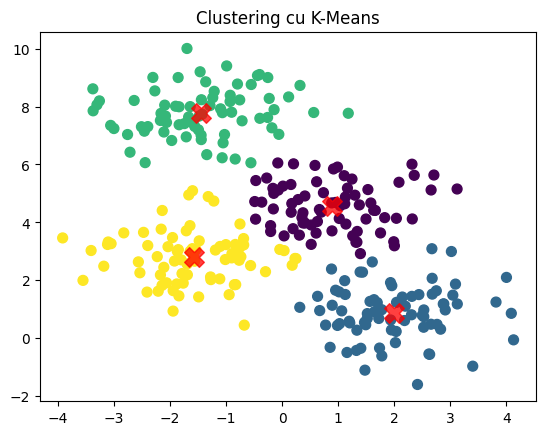

In [19]:
from sklearn.cluster import KMeans

# Exemplu 1: Aplicăm KMeans pe un set de date generat
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.9, random_state=0)

# Inițializăm modelul KMeans, specificând că vrem 4 clustere
kmeans = KMeans(n_clusters=4, n_init='auto', random_state=0)

# Antrenăm modelul și prezicem clusterele
y_kmeans = kmeans.fit_predict(X)

# Vizualizăm rezultatul
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Afișăm centroizii găsiți de algoritm
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("Clustering cu K-Means")
plt.show()

# OBS.: Parametrul n_init='auto' este important. Algoritmul va rula de mai multe
# ori cu centroizi inițiali diferiți și va alege rezultatul cu cea mai mică
# inerție (SSE), pentru a evita convergența către o soluție proastă.

In [ ]:
# __EXERCIȚIU__
# Folosind datele de mai sus (X), aplicați algoritmul KMeans încercând să
# grupați datele în k=3 clustere.
# Apoi, vizualizați rezultatul, inclusiv centroizii.

# 1. Inițializați modelul KMeans pentru k=3
kmeans_3 = None

# 2. Antrenați și preziceți etichetele
y_kmeans_3 = None

# 3. Obțineți centroizii
centers_3 = None

# 4. Vizualizare
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_3, s=50, cmap='viridis')
plt.scatter(centers_3[:, 0], centers_3[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("Încercare de clustering cu K=3")
plt.show()

# HINT: Urmați pașii din exemplul anterior, schimbând doar valoarea parametrului
# n_clusters.

## Alegerea Numărului Optim de Clustere (k)

Cea mai mare provocare în K-Means este alegerea valorii corecte pentru **k**. Două metode populare ne ajută în această decizie:

### Metoda Cotului (The Elbow Method)
Această metodă se bazează pe calcularea SSE (inerției) pentru diferite valori ale lui `k`. Pe măsură ce `k` crește, SSE scade. Reprezentăm grafic SSE în funcție de `k`. Punctul în care descreșterea SSE încetinește brusc, formând un "cot" pe grafic, este considerat valoarea optimă pentru `k`.

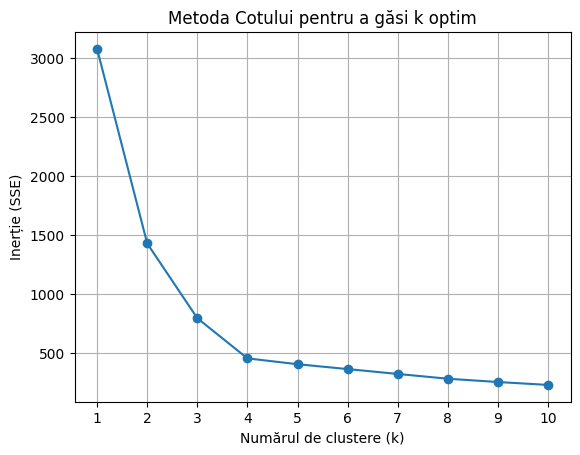

In [20]:
# Exemplu 2: Găsirea valorii optime pentru k folosind Metoda Cotului
inertia_values = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=0)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Vizualizăm curba cotului
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Numărul de clustere (k)')
plt.ylabel('Inerție (SSE)')
plt.title('Metoda Cotului pentru a găsi k optim')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# OBS.: În acest grafic, "cotul" este vizibil la k=4, ceea ce confirmă că 4 este
# un număr bun de clustere pentru datele noastre.

In [ ]:
# __EXERCIȚIU__
# Generați un nou set de date cu 6 centre folosind make_blobs.
# Apoi, folosiți metoda cotului pentru a determina numărul optim de clustere.

# 1. Generați datele
X_nou, y_nou = make_blobs(n_samples=400, centers=6, cluster_std=1.0, random_state=10)

# 2. Calculați inerția pentru k de la 1 la 10
inertia_nou = []
k_range_nou = range(1, 11)

for k in k_range_nou:
    pass

# 3. Plotați graficul



### Analiza Coeficientului Silhouette
O alternativă la metoda cotului este calcularea scorului Silhouette mediu pentru diferite valori ale lui `k`. Vom alege valoarea `k` care corespunde celui mai **mare** scor Silhouette, deoarece acest lucru indică cea mai bună combinație de coeziune și separare.

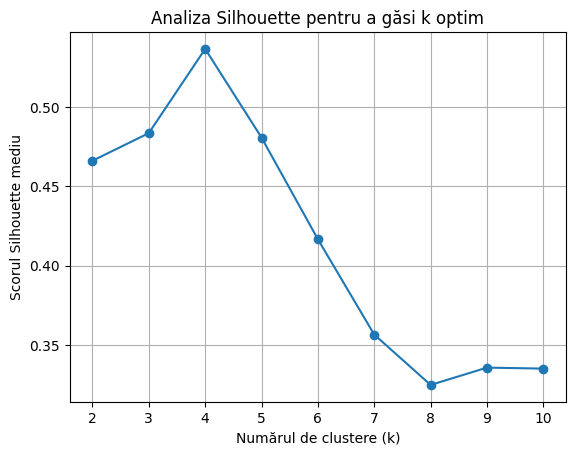

In [21]:
# Exemplu 3: Găsirea k optim cu Scorul Silhouette
silhouette_values = []
k_range_sil = range(2, 11) # Scorul Silhouette nu e definit pentru k=1

for k in k_range_sil:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=0)
    y_pred = kmeans.fit_predict(X)
    silhouette_values.append(silhouette_score(X, y_pred))

# Vizualizăm scorurile
plt.plot(k_range_sil, silhouette_values, marker='o')
plt.xlabel('Numărul de clustere (k)')
plt.ylabel('Scorul Silhouette mediu')
plt.title('Analiza Silhouette pentru a găsi k optim')
plt.xticks(k_range_sil)
plt.grid(True)
plt.show()

# OBS.: Graficul arată un vârf clar la k=4, confirmând din nou că aceasta este
# cea mai bună alegere.
# Această metodă este adesea mai fiabilă decât metoda cotului, dar necesită mai
# mult timp de calcul.

___

# Capitol 4: Alte Tipuri de Algoritmi de Clustering

Deși K-Means este foarte popular, nu este potrivit pentru toate tipurile de date. Vom explora acum alți doi algoritmi importanți care pot gestiona structuri mai complexe.

## Clustering Ierarhic Aglomerativ (Agglomerative Hierarchical Clustering)

Acest algoritm are o abordare **bottom-up** (de jos în sus). Inițial, fiecare punct este considerat un cluster individual. Apoi, algoritmul fuzionează iterativ cele mai apropiate două clustere, până când toate punctele ajung într-un singur mare cluster.

Rezultatul este o structură arborescentă numită **dendrogramă**, care ne arată ierarhia fuziunilor. Putem apoi "tăia" dendrograma la o anumită înălțime pentru a obține numărul dorit de clustere. Spre deosebire de K-Means, nu trebuie să specificăm numărul de clustere de la început, ci îl putem alege ulterior, analizând dendrograma.

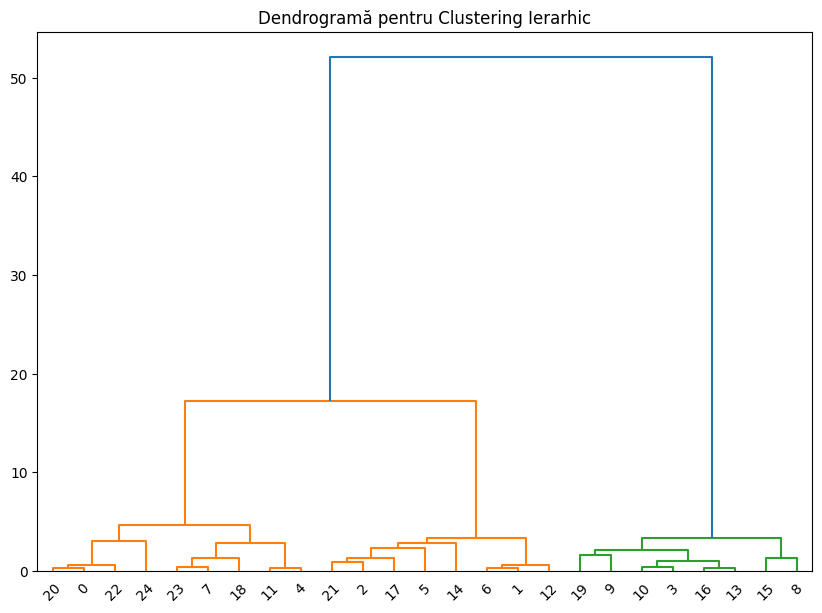

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Exemplu 1: Generăm date și vizualizăm dendrograma
X_agg, y_agg = make_blobs(n_samples=25, centers=3, cluster_std=1.0, random_state=101)

# Calculăm legăturile între puncte
# Metoda 'ward' minimizează varianța clusterelor care sunt fuzionate
linked = linkage(X_agg, method='ward')

# Desenăm dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogramă pentru Clustering Ierarhic')
plt.show()

# OBS.: Dendrograma ne arată cum punctele individuale (frunzele) sunt grupate.
# Putem alege să "tăiem" la o înălțime care intersectează 3 linii verticale
# pentru a obține 3 clustere.

In [ ]:
# __EXERCIȚIU__
# Acum, folosiți sklearn.cluster.AgglomerativeClustering pentru a grupa datele
# X_agg în 3 clustere.
# Vizualizați rezultatul folosind un scatter plot.

# 1. Inițializați modelul pentru 3 clustere
cluster_agg = None

# 2. Antrenați modelul și obțineți etichetele
y_agg_pred = None

# 3. Vizualizare
plt.scatter(X_agg[:, 0], X_agg[:, 1], c=y_agg_pred, cmap='viridis', s=50)
plt.title('Clustering Aglomerativ cu k=3')
plt.show()

# HINT: Interfața este similară cu cea de la KMeans, dar aici folosim
# `fit_predict`.

## Clustering Bazat pe Densitate: DBSCAN

**DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) funcționează pe un principiu diferit: definește clusterele ca fiind zone continue de **densitate ridicată**. Este foarte eficient în a descoperi clustere cu forme arbitrare și în a identifica punctele considerate **zgomot** (outliers).

DBSCAN are doi parametri importanți:
* `eps` (epsilon): Distanța maximă dintre două puncte pentru a fi considerate vecine.
* `min_samples`: Numărul minim de puncte necesare într-o vecinătate (definită de `eps`) pentru ca un punct să fie considerat **punct central** (core point).

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Exemplu 2: Folosim DBSCAN pe un set de date non-convex (în formă de semilună)
X_moons, y_moons = make_moons(n_samples=200, noise=0.05, random_state=0)

# Inițializăm și aplicăm DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(X_moons)

# Vizualizăm rezultatul
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_dbscan, cmap='viridis', s=50)
plt.title('Clustering cu DBSCAN')
plt.show()

# OBS.: DBSCAN a identificat corect cele două clustere în formă de semilună.
# K-Means ar fi eșuat la această sarcină. Punctele marcate cu -1 (dacă ar
# exista) ar fi considerate zgomot.

In [ ]:
# __EXERCIȚIU__
# Folosiți datele X_cercuri de la capitolul anterior.
# Aplicați DBSCAN pentru a grupa aceste date. Experimentați cu valorile `eps`
# și `min_samples` până obțineți o separare corectă a celor două cercuri.

# 1. Inițializați DBSCAN cu parametri potriviți
dbscan_cercuri = DBSCAN(eps=0.2, min_samples=5) # Încercați să modificați eps,
# de ex. la 0.2

# 2. Antrenați și preziceți etichetele
y_dbscan_cercuri = dbscan_cercuri.fit_predict(X_cercuri)

# 3. Vizualizare
plt.scatter(X_cercuri[:, 0], X_cercuri[:, 1], c=y_dbscan_cercuri, cmap='viridis', s=50)
plt.title('Clustering pe cercuri cu DBSCAN')
plt.show()

# HINT: O valoare bună pentru `eps` este în jur de 0.2. Dacă `eps` este prea
# mare, toate punctele vor fi într-un singur cluster.
# Dacă este prea mic, multe puncte vor fi considerate zgomot.